## Data Aanlaysis on Predicting the Sales on Black Friday



Import the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The dataset is taken from Kaggle competion

In [2]:
dataset = pd.read_csv("C://Users//nikhi//data//BlackFriday.csv")
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [621]:
dataset.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Dataset contains NA values , lets clean the dataset before doing any analysis

We can see Product Category 2 and Product Category 3 column needs to be clean , we will replace the NA values with 0 in both the columns

In [8]:
dataset.isna().sum(axis=0)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [9]:
dataset['Product_Category_2'].fillna('0',inplace= True)
dataset['Product_Category_2'].isna().sum(axis = 0)

0

In [10]:
dataset['Product_Category_3'].fillna('0',inplace= True)
dataset['Product_Category_3'].isna().sum(axis = 0)

0

All the columns are clean now as seen below

In [11]:
dataset.isna().sum(axis = 0)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

The values in Product_Category_2 & Product_Category_3 columns are in Float , we can convert them to Int as below

In [12]:
dataset['Product_Category_2'] = dataset['Product_Category_2'].astype(int)
dataset['Product_Category_3'] = dataset['Product_Category_3'].astype(int)

Lets do some plotting :

Lets sum the total purchase by each User ID

In [13]:
sum_of_userid_purchase = dataset.groupby(['User_ID','Gender','Product_ID'])['Purchase'].sum()
df_sum_userid_pur = pd.DataFrame(sum_of_userid_purchase)
df_sum_userid_pur_plot = df_sum_userid_pur[1:35]

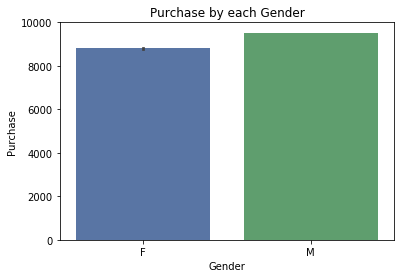

In [14]:
sns.barplot('Gender', 'Purchase', data = dataset, palette="deep")
plt.title('Purchase by each Gender')
plt.show()

Analyse the amount of purchase done by each Gender and Plot

In [15]:
sum_of_Gender_purchase = df_sum_userid_pur.groupby(['Gender'])['Purchase'].sum()
sum_of_Gender_purchase
df_sum_Gender_purchase = pd.DataFrame(sum_of_Gender_purchase)
df_sum_Gender_purchase

,Purchase
Gender,
F,1164624021
M,3853044357


It can be seen that the Male have done more purhcase

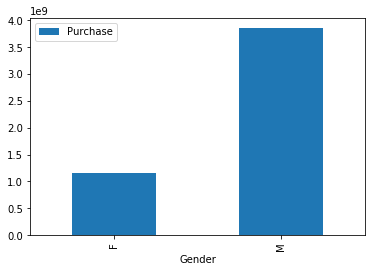

In [16]:
df_sum_Gender_purchase
df_sum_Gender_purchase.plot(kind='bar')

Now Lets check the Purchase by eaach Product Categories 
ie: Analyzing which Item from Product Category was sold maximum,
    Gender who purchased the highest Item,
    Occupation of teh Gender,
    Marital Status of the Gender

Geeting the details about Product Category such as - Max  item number sold from each category , highest buyer in gender , age of the gender etc

Lets define some functions for code reusability

Function to determine the Group by feature for respective columns

In [4]:
def prod_cat(input1,input2):
    prod_cat = dataset.groupby(input1)[input2].sum()
    return prod_cat

Function to give the overall count (Unique count for each item in column)

In [5]:
def prod_cat_count(col):
    count =dataset[col].value_counts()
    return count

Function to give the unique values of Columns passed

In [6]:
def unique(input1):
    return(np.unique(dataset[input1]))

## Analysis on Product Category 1

In [21]:
prod_cat1 = prod_cat('Gender','Product_Category_1')

In [22]:
pro_cat_1  = unique('Product_Category_1')
pro_cat_1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int64)

Take the number of items corresponding to each Item Number.

It can be seen that the maximum Item is 5 from product catgory1,
lets check the gender who purchased the max of Item 5 

In [23]:
prod_cat_count('Product_Category_1')

5     148592
1     138353
8     112132
11     23960
2      23499
6      20164
3      19849
4      11567
16      9697
15      6203
13      5440
10      5032
12      3875
7       3668
18      3075
14      1500
17       567
9        404
Name: Product_Category_1, dtype: int64

Get the dataset for Product Category 1 having Items equals to 5

In [24]:
cat1 = dataset['Product_Category_1']==5
cat1
dataset1_category1 = dataset[cat1]
print(dataset1_category1.shape)

(148592, 12)


We now have the dataset having only Item 5 of Product Category

In [25]:
dataset1_category1.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
10,1000005,P00251242,M,26-35,20,A,1,1,5,11,0,5254
14,1000006,P00231342,F,51-55,9,A,1,0,5,8,14,5378
17,1000006,P00058442,F,51-55,9,A,1,0,5,14,0,8851


Lets find the Gender who spent Maximum on Item 5.

It can be observed from below that maxium purchase was by Males.

In [26]:
gender_count = dataset1_category1['Gender'].value_counts()
gender_count

M    107393
F     41199
Name: Gender, dtype: int64

Lets plot it.
It can be seen that 72.3% Males purchased the Item 5 from Product category 1

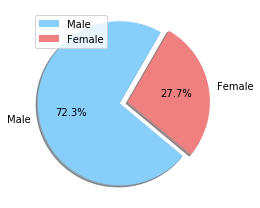

In [132]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.pie(dataset1_category1['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',colors = ['lightskyblue','lightcoral'],
        shadow=True, startangle=60)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [64]:
dataset_cat1_all = dataset1_category1[(dataset1_category1.Gender == 'M') & (dataset1_category1.Product_Category_1 == 5)]

In [45]:
dataset_cat1_all['Gender'].value_counts()

M    107393
Name: Gender, dtype: int64

In [734]:
# dataset_cat1_all.groupby(['Marital_Status','Age'])['Gender'].size().unstack().plot(kind='bar',stacked=False)
# plt.show()

Maximum Males who Purchased Item 5 have Occupation 4

In [46]:
dataset_cat1_all['Occupation'].value_counts()

4     14735
0     13139
7     12436
17     8477
1      7452
12     6877
20     6714
16     5561
14     5228
2      4852
6      3284
11     2886
3      2885
5      2580
15     2426
10     2377
19     1849
18     1682
13     1536
8       297
9       120
Name: Occupation, dtype: int64

Marital Status of Male

In [47]:
dataset_cat1_all['Marital_Status'].value_counts()

dataset_crosstab = pd.crosstab(dataset_cat1_all['Gender'] , dataset_cat1_all['Marital_Status'])
dataset_crosstab

Marital_Status,0,1
Gender,,
M,64514,42879


In [48]:
dataset_cat1_all['Stay_In_Current_City_Years'].value_counts()

1     36398
2     20278
3     18539
4+    16919
0     15259
Name: Stay_In_Current_City_Years, dtype: int64

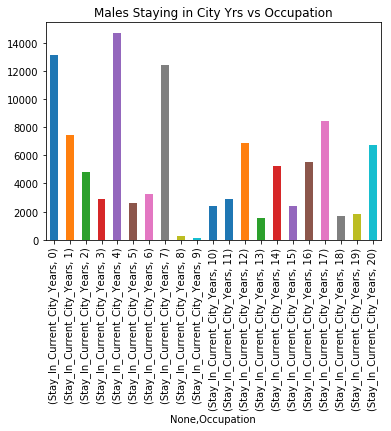

In [110]:
data_stay_yrs_cat1 = dataset_cat1_all.groupby(['Occupation'])['Stay_In_Current_City_Years'].count()
data_stay_yrs_cat1 = pd.DataFrame(data_stay_yrs_cat1)
data_stay_yrs_cat1
data_stay_yrs_cat1.unstack().plot(kind='bar',stacked=False, title = 'Males Staying in City Yrs vs Occupation')

Lets Plot Marital Status and Age of Male 

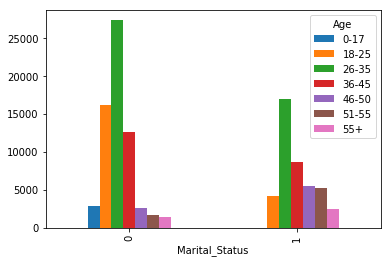

In [91]:
dataset_cat1_all.groupby(['Marital_Status','Age'])['Gender'].size().unstack().plot(kind='bar',stacked=False)
plt.show()

Lets Plot Marital Status  Age , Occupation of Male 

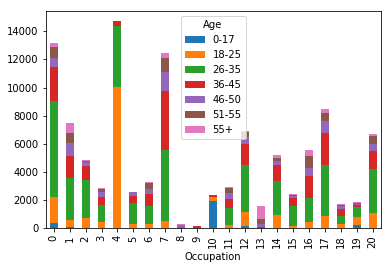

In [92]:
dataset_cat1_all.groupby(['Occupation','Age'])['Marital_Status'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

Stay in Current CIty

Get the Unique Genders and check the Age group of Males who purchased Item 5

In [724]:
gend_unique = unique('Age')
gend_unique

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

It can be seen that the age group of 0-17 in Males have purchased maximum Item 5 from Product_category1

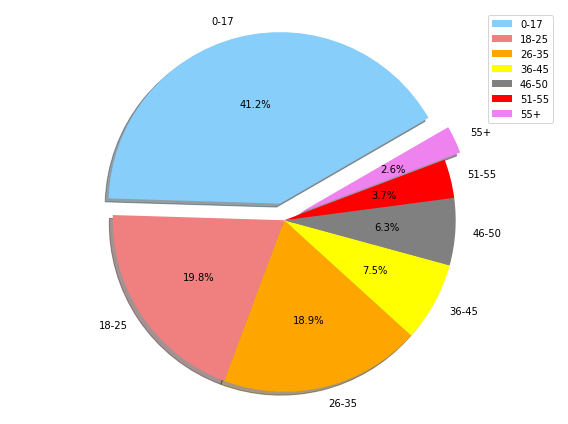

In [130]:
explode = (0.1,0,0,0,0,0,0.1)  
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(dataset_cat1_all['Age'].value_counts(), explode=explode,labels=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], autopct='%1.1f%%',colors = ['lightskyblue','lightcoral','orange','yellow','grey','red','violet'],
        shadow=True, startangle=30)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [124]:
group_names= dataset_cat1_all['Occupation'].value_counts()
group_size=[12,11,30,15,20,10,20,10,40,30,20,10,10,20,30,11,34,23,24,30,12]
group_names

data_stay_yrs_cat1 
subgroup_names= data_stay_yrs_cat1['Stay_In_Current_City_Years']
subgroup_size=[4,3,5,6,5,10,5,5,4,6,4,3,5,6,3,2,4,5,3]
# group_names

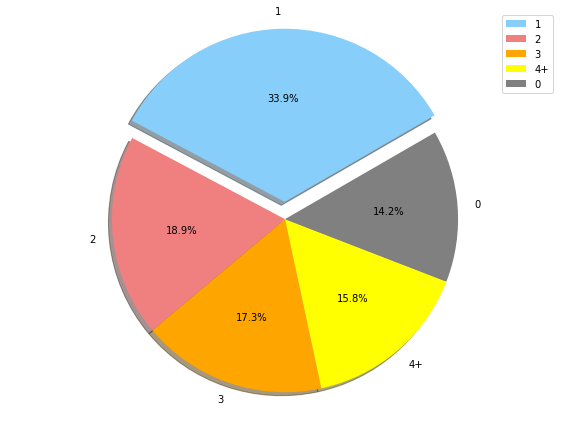

In [134]:
explode = (0.1,0,0,0,0)  
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(dataset_cat1_all['Stay_In_Current_City_Years'].value_counts(), explode=explode,labels=['1','2','3','4+','0'], autopct='%1.1f%%',colors = ['lightskyblue','lightcoral','orange','yellow','grey'],
        shadow=True, startangle=30)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In Age group 0-17 who purchased Item 5 from Category 1 are unmarried

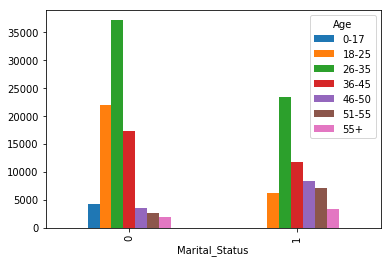

In [136]:
dataset1_category1.groupby(['Marital_Status','Age'])['Gender'].size().unstack().plot(kind='bar',stacked=False)
plt.show()

## Now Lets check the age group and the gender who purchase the maximum Items from Product Category 2:

First take out the unique items from Product Category 2

In [15]:
pro_cat_2  = unique('Product_Category_2')
pro_cat_2 

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

Check the maximum  item number sold in Category 2:
We can see the maximum Item number is 8 , we neglect 0 because these are NAN values

Now lets figure out the gender and the age group who bought Item no 8

In [16]:
prod_cat_count('Product_Category_2')

0     166986
8      63058
14     54158
2      48481
16     42602
15     37317
5      25874
4      25225
6      16251
11     13945
17     13130
13     10369
9       5591
12      5419
10      2991
3       2835
18      2730
7        615
Name: Product_Category_2, dtype: int64

Get the Dataframe having Item 8 in Product Category 2

In [17]:
dataset_prod2 = dataset[(dataset.Product_Category_2 == 8)]
dataset_prod2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215
14,1000006,P00231342,F,51-55,9,A,1,0,5,8,14,5378
24,1000008,P00303442,M,26-35,12,C,4+,1,1,8,14,11927
25,1000009,P00135742,M,26-35,17,C,0,0,6,8,0,16662
28,1000009,P00078742,M,26-35,17,C,0,0,5,8,14,5391


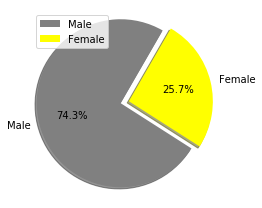

In [18]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.pie(dataset_prod2['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',colors = ['grey','Yellow'],
        shadow=True, startangle=60)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

Lets start the Analyzing part for Product Category2

In [19]:
dataset_cat2_all = dataset_prod2[(dataset_prod2.Gender == 'M') & (dataset_prod2.Product_Category_2 == 8)]
dataset_cat2_all

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215
24,1000008,P00303442,M,26-35,12,C,4+,1,1,8,14,11927
25,1000009,P00135742,M,26-35,17,C,0,0,6,8,0,16662
28,1000009,P00078742,M,26-35,17,C,0,0,5,8,14,5391
51,1000012,P00365242,M,26-35,12,C,2,0,5,8,0,6865
56,1000015,P00334242,M,26-35,7,A,1,0,1,8,0,19653
59,1000015,P00275142,M,26-35,7,A,1,0,5,8,0,5380
60,1000015,P00333042,M,26-35,7,A,1,0,5,8,0,3594
62,1000015,P00161942,M,26-35,7,A,1,0,5,8,0,5407
98,1000022,P00351142,M,18-25,15,A,4+,0,1,8,17,12099


In [20]:
dataset_cat2_all['Gender'].value_counts()

M    46842
Name: Gender, dtype: int64

In [ ]:
dataset_cat2_all.plot(kind= 'bar')

In [ ]:
dataset_prod2_Split = dataset_prod2.groupby(['Gender' , 'Marital_Status' ,'Age'])['Gender'].count()
dataset_prod2_Split = pd.DataFrame(dataset_prod2_Split)
dataset_prod2_Split


We plot the Gender , Age and Maritial Status for Item 8 in Product Cat 2 

In [ ]:
dataset_prod2_Split.plot(kind = 'bar')

Lets check the age group and gender

It can be seen that the maxim purchaser are Males here, It can be possible that the Males have their spouses with them and they have paid for them

Text(0,0.5,'Total Number')

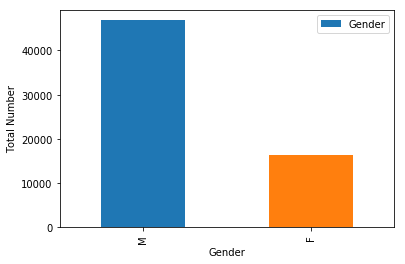

In [163]:
gender_count_2 = dataset_prod2['Gender'].value_counts()
gender_count_2.plot(kind = 'bar',legend = True)
plt.xlabel('Gender')
plt.ylabel('Total Number')

Lets check the Marriage status of the Males & Females

So from the Males who have purchased Item 8 from Category 2 (46842) : 19286 are married as seen below


In [164]:
df_gender_cat2 = pd.crosstab(dataset_prod2.Gender , dataset_prod2.Marital_Status)
df_gender_cat2

Marital_Status,0,1
Gender,,
F,9256,6960
M,27556,19286


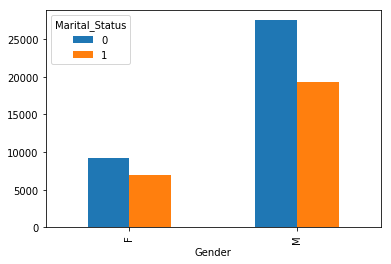

In [165]:
df_gender_cat2.plot(kind  = 'bar')

Lets check the Age of the Males 

In [166]:
dataset_prod2_age = dataset_prod2['Age'].value_counts()
dataset_prod2_age

26-35    25597
36-45    12649
18-25    10732
46-50     5351
51-55     4667
55+       2682
0-17      1380
Name: Age, dtype: int64

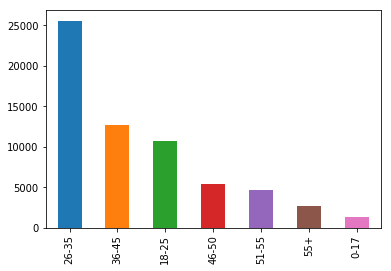

In [167]:
dataset_prod2_age.plot(kind = 'bar')

In [175]:
dataset_prod2_Split2 = dataset_prod2.groupby(['Gender' , 'Marital_Status' ,'Age'])['Marital_Status'].count()
# dataset_prod2_Split2.size().unstack().plot(kind='bar',stacked=False)

# dataset_prod2.groupby(['Marital_Status','Age'])['Gender'].size().unstack().plot(kind='bar',stacked=False)
plt.show()

In [435]:
dataset_prod2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,max
6,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215,19693
14,1000006,P00231342,F,51-55,9,A,1,0,5,8,14,5378,19538
24,1000008,P00303442,M,26-35,12,C,4+,1,1,8,14,11927,19944
25,1000009,P00135742,M,26-35,17,C,0,0,6,8,0,16662,20278
28,1000009,P00078742,M,26-35,17,C,0,0,5,8,14,5391,20278


Lets plot the Male who are married between Age 26-35

## Lets check for Product Category 3

In [486]:
pro_cat_3  = unique('Product_Category_3')
pro_cat_3

array([ 0,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

In [518]:
pro_cat_max_count = dataset['Product_Category_3'].value_counts()
pro_cat_max_count

0     373299
16     32148
15     27611
14     18121
17     16449
5      16380
8      12384
9      11414
12      9094
13      5385
6       4818
18      4563
4       1840
11      1773
10      1698
3        600
Name: Product_Category_3, dtype: int64

Maximum count is for Item 16 in Product Category 2 , We neglect 0 as these are NA values

Check the Gender

In [523]:
dataset_max_cat3 = dataset[(dataset.Product_Category_3 == 16)]
dataset_max_cat3

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
18,1000007,P00036842,M,36-45,1,B,1,1,1,14,16,11788
41,1000010,P00111142,F,36-45,1,B,4+,1,1,15,16,18963
75,1000018,P00034442,F,18-25,3,B,3,0,1,14,16,19313
103,1000022,P00262242,M,18-25,15,A,4+,0,1,11,16,12098
116,1000023,P00000642,M,36-45,0,B,3,1,1,6,16,12015
198,1000036,P00345642,M,26-35,3,B,0,0,1,15,16,15812
215,1000036,P00028442,M,26-35,3,B,0,0,1,8,16,15285
270,1000048,P00114942,M,26-35,4,B,3,1,1,15,16,15783
285,1000048,P00078542,M,26-35,4,B,3,1,1,2,16,11853
287,1000048,P00324442,M,26-35,4,B,3,1,11,13,16,3101


In [570]:
# dataset_gender_3 = dataset_max_cat3[(dataset_max_cat3.Marital_Status)]

dataset_prod3_Split = dataset_max_cat3.groupby(['Gender' , 'Marital_Status' ,'Age'])['Gender'].count()
dataset_prod3_Split = pd.DataFrame(dataset_prod3_Split)
dataset_prod3_Split

Gender
Gender Marital_Status Age          
F      0              0-17      199
                      18-25     978
                      26-35    1475
                      36-45     889
                      46-50     157
                      51-55     159
                      55+        92
       1              18-25     316
                      26-35    1034
                      36-45     506
                      46-50     476
                      51-55     266
                      55+       111
M      0              0-17      648
                      18-25    3948
                      26-35    6590
                      36-45    2966
                      46-50     490
                      51-55     437
                      55+       290
       1              18-25     977
                      26-35    4146
                      36-45    1900
                      46-50    1299
                      51-55    1252
                      55+       547

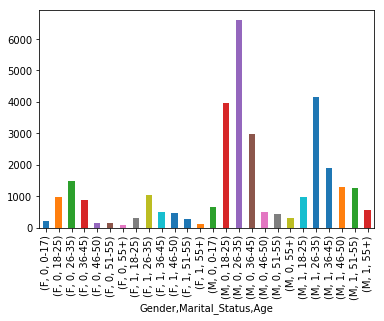

In [526]:
dataset_prod3_Split.plot(kind = 'bar')

In [536]:
dataset_prod3_gender = pd.crosstab(dataset_max_cat3['Gender'] , dataset_max_cat3['Marital_Status'] )
dataset_prod3_gender

Marital_Status,0,1
Gender,,
F,3949,2709
M,15369,10121


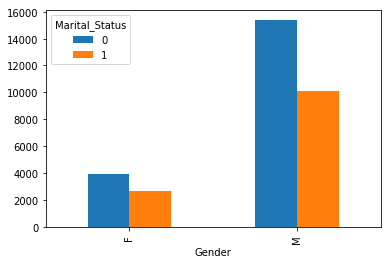

In [545]:
dataset_prod3_gender.plot(kind = 'bar')

In [537]:
gender_count_3 = dataset_max_cat3['Gender'].value_counts()
gender_count_3

M    25490
F     6658
Name: Gender, dtype: int64

Lets check the age of the Males 

In [575]:
dataset_max_cat3_all = dataset_max_cat3[(dataset_max_cat3.Gender == 'M') & (dataset_max_cat3.Product_Category_3 == 16)]
dataset_max_cat3_all.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
18,1000007,P00036842,M,36-45,1,B,1,1,1,14,16,11788
103,1000022,P00262242,M,18-25,15,A,4+,0,1,11,16,12098
116,1000023,P00000642,M,36-45,0,B,3,1,1,6,16,12015
198,1000036,P00345642,M,26-35,3,B,0,0,1,15,16,15812
215,1000036,P00028442,M,26-35,3,B,0,0,1,8,16,15285


Age Group 26-35 has maximum Males purchasing the Item 16

In [552]:
dataset_max_cat3_age = dataset_max_cat3_all['Age'].value_counts()

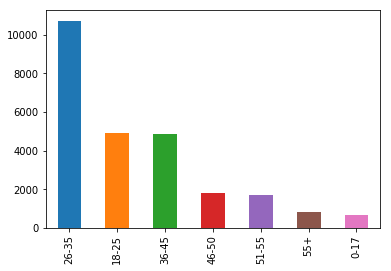

In [554]:
dataset_max_cat3_age.plot(kind = 'bar')

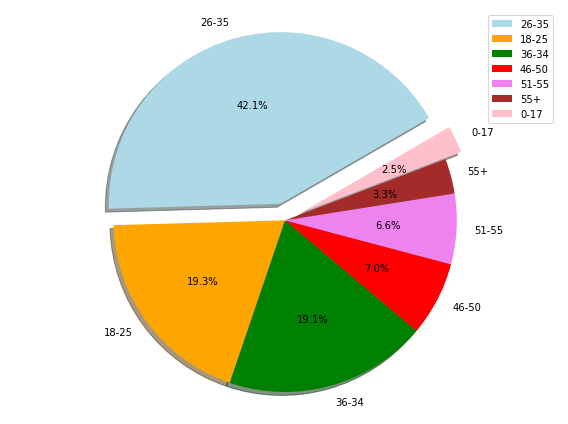

In [569]:
explode3 = (0.1,0,0,0,0,0,0.1)  
fig1, ax3 = plt.subplots(figsize=(8,6))
ax3.pie(dataset_max_cat3_all['Age'].value_counts(), explode=explode3,labels=['26-35','18-25','36-34','46-50','51-55','55+','0-17'], autopct='%1.1f%%',colors = ['lightblue','orange','green','red','violet','brown','pink'],
        shadow=True, startangle=30)
# Equal aspect ratio ensures that pie is drawn as a circle
ax3.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

In [577]:
dataset_max_cat3_occ = dataset_max_cat3_all['Occupation'].value_counts()
dataset_max_cat3_occ

4     3552
0     3210
7     2947
17    2529
12    1885
1     1652
20    1348
14    1347
16    1170
2     1085
6      675
15     617
5      613
3      572
10     564
11     527
19     401
18     392
13     307
8       70
9       27
Name: Occupation, dtype: int64

The Males in Age Group 26-35 shopped a lot and their Occupation belongs to 4 as seen below

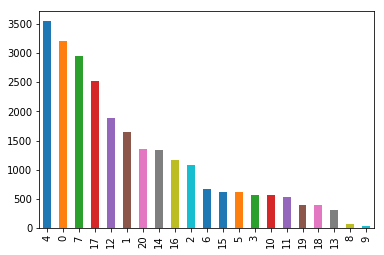

In [579]:
dataset_max_cat3_occ.plot(kind='bar')

In [616]:
dataset_max_cat3_prod_id = dataset_max_cat3_all['Product_ID'].value_counts()

In [617]:
dataset_max_cat3_prod_purc = dataset_max_cat3_all[(dataset_max_cat3_all.Product_ID == 'P00057642') & (dataset_max_cat3_all.Gender == 'M') & (dataset_max_cat3_all.Occupation == 4) & (dataset_max_cat3_all.Age == '26-35')]

In [618]:
dataset_max_cat3_prod_purc.groupby(['Product_ID','Purchase']).sum()

User_ID  Occupation  Marital_Status  Product_Category_1  \
Product_ID Purchase                                                            
P00057642  4209      1005232           4               1                   1   
           4355      1005585           4               0                   1   
           7977      1001474           4               1                   1   
           8180      1002984           4               1                   1   
           11390     1003250           4               1                   1   
           11450     1004658           4               1                   1   
           11614     1003916           4               1                   1   
           11727     1001757           4               0                   1   
           11848     1001775           4               1                   1   
           12072     1005053           4               0                   1   
           12088     1004485           4               0                   1   
           15284     1002748           4               0                   1   
           15311     1005874           4               0                   1   
           15452     1002986           4               1                   1   
           15466     1002432           4               1                   1   
           15483     1003000           4               0                   1   
           15514     1001244           4               1                   1   
           15589     1005576           4               0                   1   
           15599     1002437           4               1                   1   
           15672     1000563           4               0                   1   
           15676     1003912           4               0                   1   
           15681     1004977           4               0                   1   
           15685     1000783           4               0                   1   
           15713     1005321           4               0                   1   
           15744     1003085           4               0                   1   
           15756     1001530           4               1                   1   
           15801     1001266           4               1                   1   
           15813     1001793           4               0                   1   
           19017     1001746           4               1                   1   
           19026     1004379           4               0                   1   
           19033     1003679           4               0                   1   
           19056     1002012           4               1                   1   
           19083     1002030           4               0                   1   
           19084     1000705           4               1                   1   
           19193     1003409           4               1                   1   
           19199     1004638           4               0                   1   
           19250     1003260           4               1                   1   
           19279     1000876           4               0                   1   
           19304     1003317           4               1                   1   
           19403     1004310           4               1                   1   
           19410     1004621           4               1                   1   
           19478     1005208           4               1                   1   
           19516     1003361           4               0                   1   
           19650     1003671           4               0                   1   
           19683     1000610           4               0                   1   

                     Product_Category_2  Product_Category_3  
Product_ID Purchase                                          
P00057642  4209                      15                  16  
           4355                      15                  16  
           7

## Conclusion :

The analysis states that the Males did a lot of shopping from each Product Category
Out of Married and Unmarried , maximum shooping was done from Married Category 

Product Category 1 : Item 
Product Category 2 : Item 8 was the maximum sold
Product Category 3 : Item 16 was the maximum sold by the Males in Occupation 4